In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [44]:
# Load your wine dataset
df = pd.read_csv('./datasets/wine.csv')

In [45]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


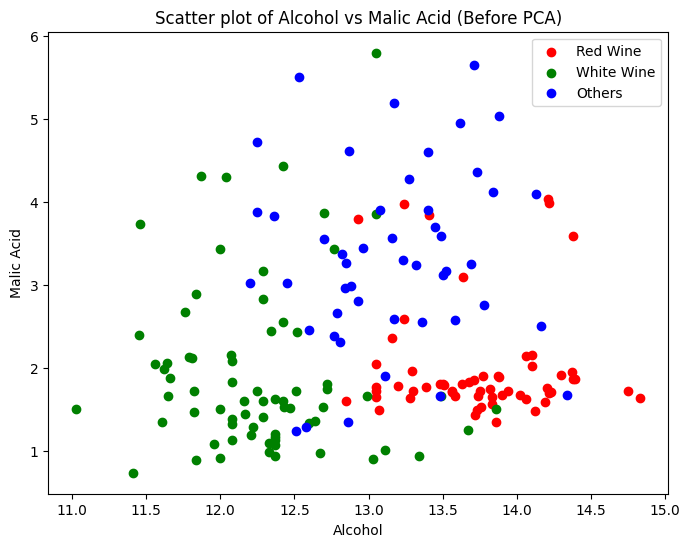

In [47]:
# Scatter plot of two features before PCA
plt.figure(figsize=(8, 6))
plt.scatter(df[df['Customer_Segment'] == 1]['Alcohol'], df[df['Customer_Segment'] == 1]['Malic_Acid'], color='r', label='Red Wine')
plt.scatter(df[df['Customer_Segment'] == 2]['Alcohol'], df[df['Customer_Segment'] == 2]['Malic_Acid'], color='g', label='White Wine')
plt.scatter(df[df['Customer_Segment'] == 3]['Alcohol'], df[df['Customer_Segment'] == 3]['Malic_Acid'], color='b', label='Others')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.title('Scatter plot of Alcohol vs Malic Acid (Before PCA)')
plt.legend()
plt.show()


In [48]:
# Separate the features from the target variable
X = df.drop(columns=['Customer_Segment'])
y = df['Customer_Segment']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [56]:
# Initialize PCA and fit it to the standardized data
pca = PCA(n_components=2)  # Reducing to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the transformed data
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Customer_Segment'] = y  # Add the target variable (wine type) for later visualization


In [57]:
pca

PCA(n_components=2)

In [58]:
pca_df

,PC1,PC2,Customer_Segment
0,3.316751,1.443463,1
1,2.209465,-0.333393,1
2,2.516740,1.031151,1
3,3.757066,2.756372,1
4,1.008908,0.869831,1
...,...,...,...
173,-3.370524,2.216289,3
174,-2.601956,1.757229,3
175,-2.677839,2.760899,3
176,-2.387017,2.297347,3


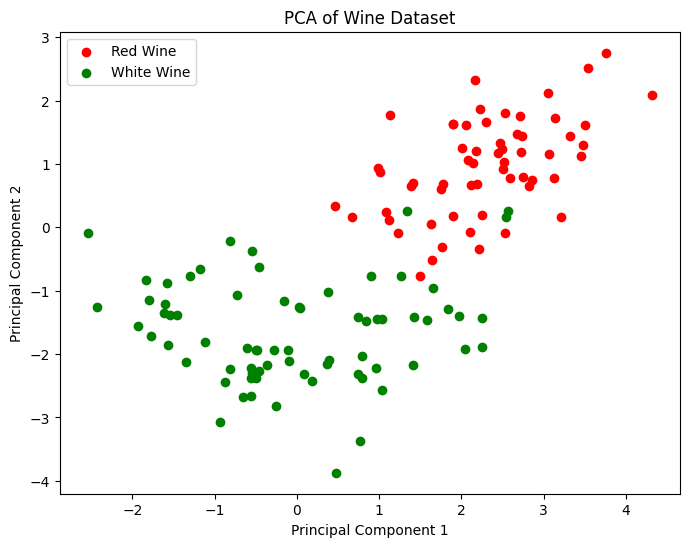

In [59]:
# Plotting the results of PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_df[pca_df['Customer_Segment'] == 1]['PC1'], pca_df[pca_df['Customer_Segment'] == 1]['PC2'], color='r', label='Red Wine')
plt.scatter(pca_df[pca_df['Customer_Segment'] == 2]['PC1'], pca_df[pca_df['Customer_Segment'] == 2]['PC2'], color='g', label='White Wine')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.legend()
plt.show()


In [60]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each principal component: {explained_variance}")
print(f"Total explained variance: {sum(explained_variance)}")


Explained variance by each principal component: [0.36198848 0.1920749 ]
Total explained variance: 0.5540633835693528


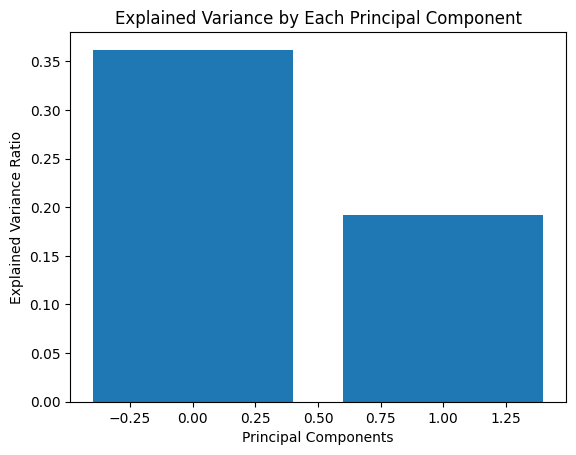

In [69]:
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Each Principal Component')
plt.show()


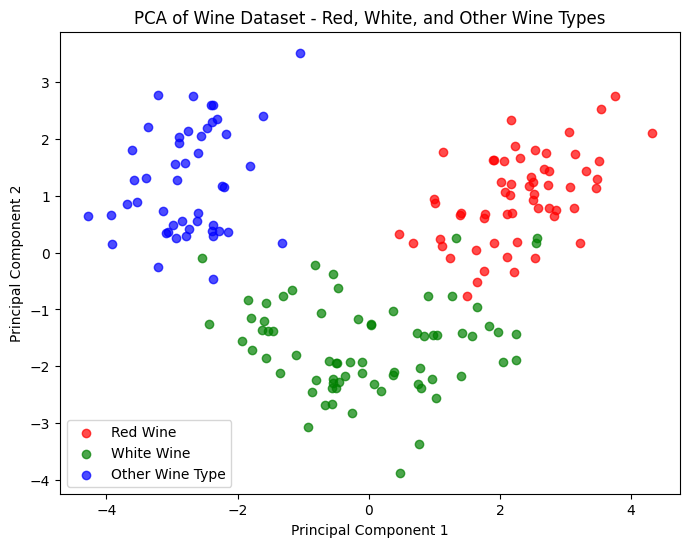

In [37]:
import matplotlib.pyplot as plt

# Scatter plot for PCA results, differentiating by Customer_Segment
plt.figure(figsize=(8, 6))

# Plot Customer_Segment 1 (e.g., Red Wine)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 1]['PC1'], 
            pca_df[pca_df['Customer_Segment'] == 1]['PC2'], 
            color='r', label='Red Wine', alpha=0.7)

# Plot Customer_Segment 2 (e.g., White Wine)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 2]['PC1'], 
            pca_df[pca_df['Customer_Segment'] == 2]['PC2'], 
            color='g', label='White Wine', alpha=0.7)

# Plot Customer_Segment 3 (e.g., Other Wine Type)
plt.scatter(pca_df[pca_df['Customer_Segment'] == 3]['PC1'], 
            pca_df[pca_df['Customer_Segment'] == 3]['PC2'], 
            color='b', label='Other Wine Type', alpha=0.7)

# Adding labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset - Red, White, and Other Wine Types')
plt.legend()

# Show the plot
plt.show()


In [66]:
# Perform PCA on the standardized data
pca = PCA(n_components=2)  # You can choose the number of components based on the variance
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components and the Customer_Segment
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Customer_Segment'] = df['Customer_Segment']

# Show the resulting dataset
print(pca_df.head())


        PC1       PC2  Customer_Segment
0  3.316751  1.443463                 1
1  2.209465 -0.333393                 1
2  2.516740  1.031151                 1
3  3.757066  2.756372                 1
4  1.008908  0.869831                 1


In [67]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
